In [43]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [44]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num (1).csv


In [45]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [46]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [47]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None

    #--------------------------------
    def fit(self, X):

        self.mean = np.mean(X, axis=0)

        # расчет матрицы ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #индексы сортировки по значениям собственных векторов

        # сортируем собственные вектора и значения
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]

        return self

    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(12,4)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'-o', label='all eigvalues')
        plt.plot(self.values[:self.n_components],'-o', label='eigen subspace')
        plt.title('eigenvalues');plt.legend();plt.show()


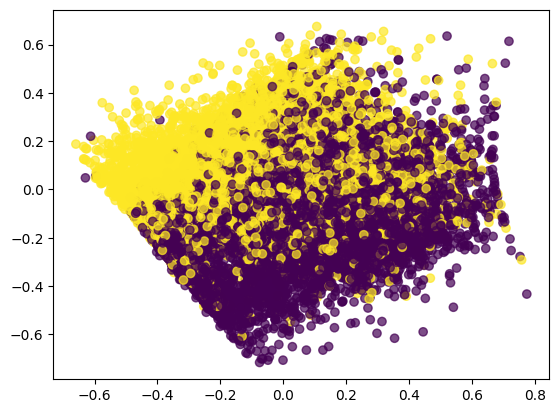

eigenvalues [0.0432144  0.03199174 0.01798884 0.00375675 0.00275689]


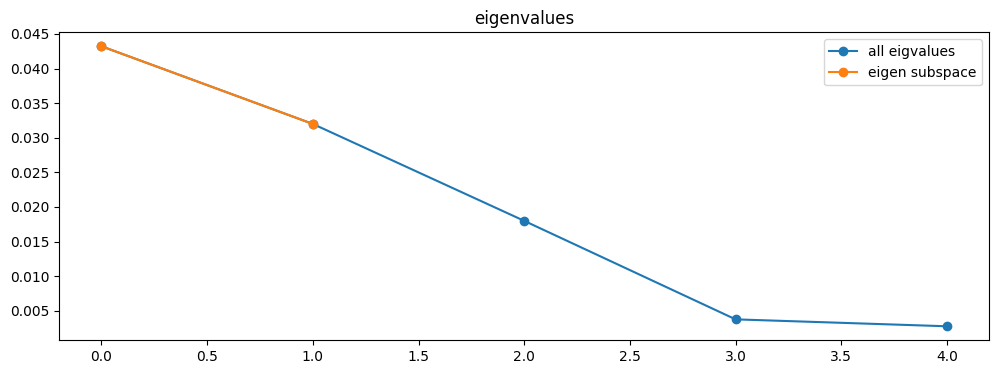

score: 0.9244683467013006


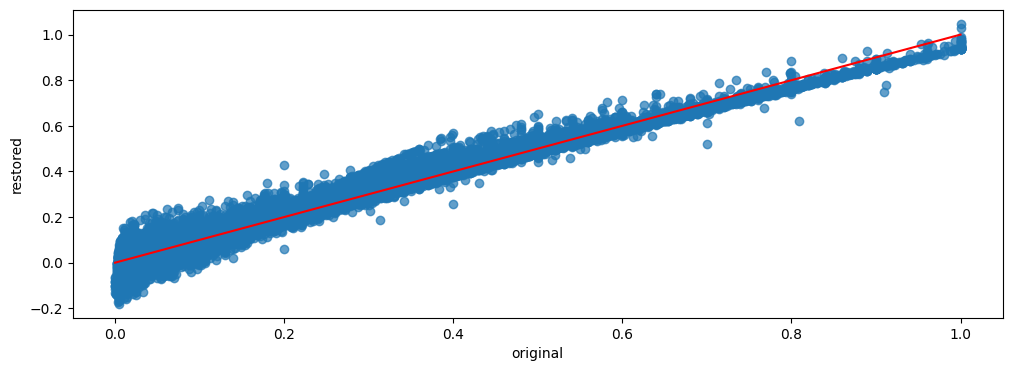

In [48]:
df_num = df[num_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)

labels = df.Transmission.values

pca = PCA(n_components = 2)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c =labels, alpha = 0.7);
plt.show()

print('eigenvalues',pca.values)
pca.plot_eigvalues()

print('score:',pca.score(X))

X2 = pca.inverse_transform(X_new)
plt.figure(figsize=(12,4))
plt.scatter(X[:,1],X2[:,1],alpha = 0.7 )
plt.plot([X[:,1].min(),X[:,1].max()],[X[:,1].min(),X[:,1].max()], 'r')
plt.xlabel('original')
plt.ylabel('restored');

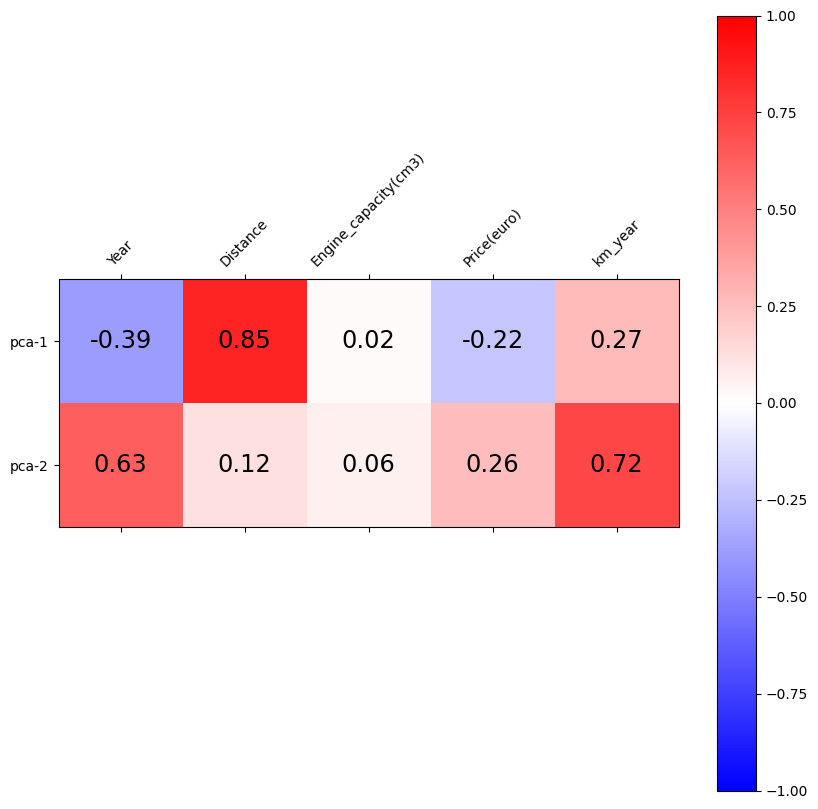

In [49]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['pca-'+str(x+1) for x in range(2)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'xx-large')
plt.xticks(np.arange(0, W.shape[1]), df[num_columns].columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

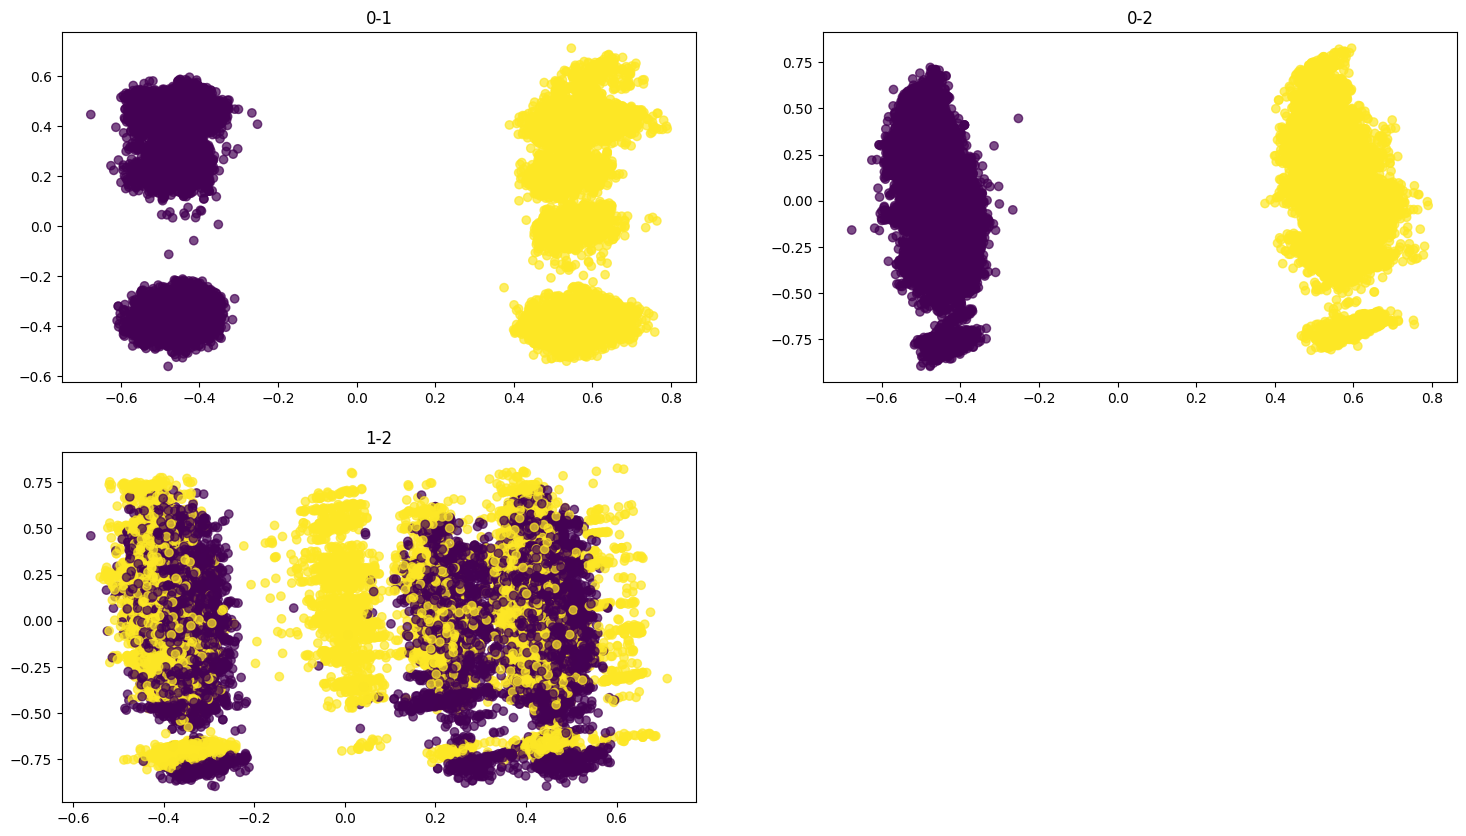

score: 0.7913503446575314


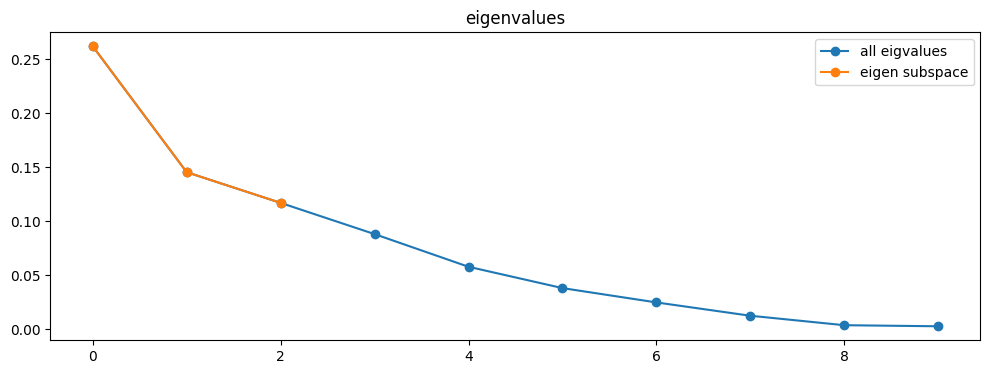

In [50]:
scaler    = MinMaxScaler()
X_cluster = scaler.fit_transform(df)
pca = PCA(n_components=3)

X_new = pca.fit_transform(X_cluster)
X_new.shape

plt.figure(figsize=(18,10))
plt.subplot(221); plt.scatter(X_new[:,0],X_new[:,1], c =labels, alpha = 0.7); plt.title("0-1")
plt.subplot(222); plt.scatter(X_new[:,0],X_new[:,2], c =labels, alpha = 0.7); plt.title("0-2")
plt.subplot(223); plt.scatter(X_new[:,1],X_new[:,2], c =labels, alpha = 0.7); plt.title("1-2")
plt.show();

print('score:',pca.score(X_cluster))
pca.plot_eigvalues()

In [51]:
print('eigenvalues',np.cumsum(pca.values))

eigenvalues [0.26189664 0.4072552  0.52420759 0.61226543 0.67008502 0.70816201
 0.732978   0.74547231 0.7492039  0.75194438]


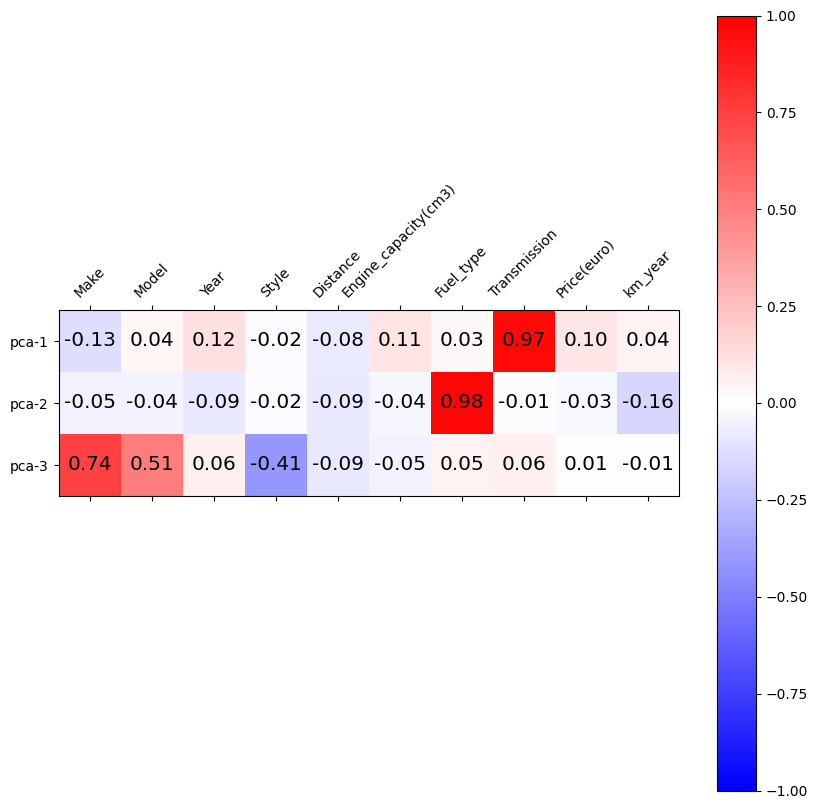

In [52]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['pca-'+str(x+1) for x in range(3)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

In [53]:
df_num = df[num_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)
X.shape

(32074, 5)

In [54]:
def distance(X1, X2):
    return np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))

In [55]:
print(distance(X[0], X[1]))
print(distance(X[:5], X[10:15]))
print(distance(X[0], X[10:15]))

0.14922460154126457
[0.37583771 0.6149593  0.29364398 0.15344456 0.37425772]
[0.37583771 0.49053137 0.15160638 0.18870645 0.15370143]


In [56]:
def init_centroids(X, n_clusters):
    centroid_idxs = np.random.randint(0, X.shape[0], size = n_clusters)
    return X[centroid_idxs,:]

In [57]:
n_clusters = 2
centroids = init_centroids(X, n_clusters)
print(centroids)

[[0.76       0.49989998 0.27083333 0.0260521  0.38338215]
 [0.86       0.27785557 0.58333333 0.2755511  0.34619238]]


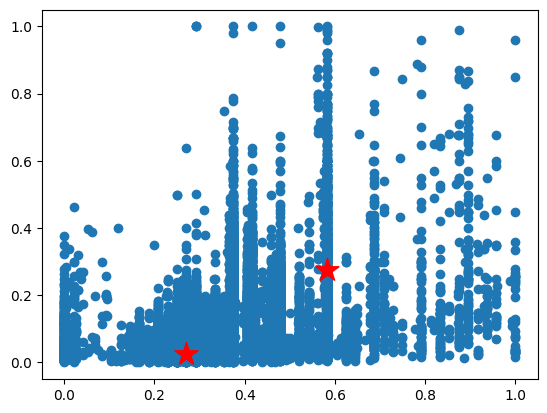

In [58]:
plt.scatter(X[:, 2], X[:, 3])
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', s=300, c='red')
plt.show()

In [59]:
def predict(X, n_clusters, centroids):
    distances = np.zeros((X.shape[0], n_clusters))

    for i,centr in enumerate(centroids):
        distances[:,i] = distance(centr,X)

    cluster_label = np.argmin(distances,axis = 1)
    return cluster_label

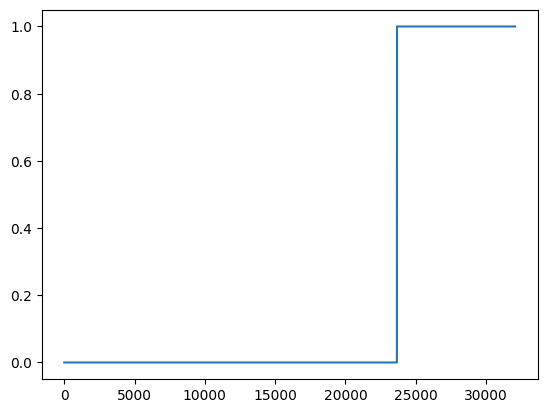

In [60]:
cluster_label=predict(X, n_clusters, centroids)
plt.plot(np.sort(np.copy(cluster_label)));

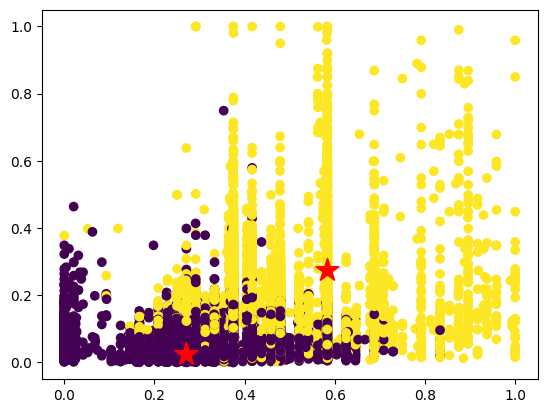

In [61]:
plt.scatter(X[:, 2], X[:, 3], c = cluster_label, )
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', s=300, c='red')
plt.show()

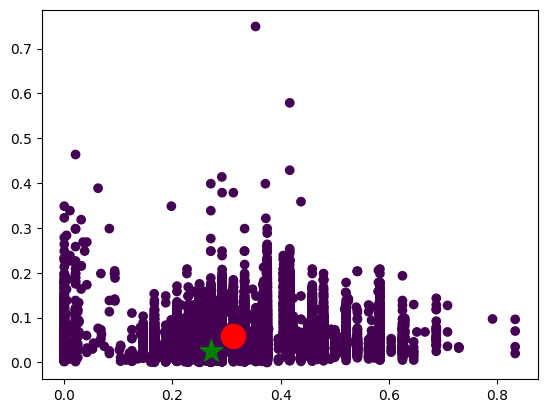

In [62]:
c_idxs = np.flatnonzero(cluster_label==0)
cluster_zero = X[c_idxs]
new_centroid = cluster_zero.mean(axis = 0)
plt.scatter(cluster_zero[:, 2], cluster_zero[:, 3], c = cluster_label[c_idxs])
plt.scatter(new_centroid[2], new_centroid[3], marker='o', s=300, c='red')
plt.scatter(centroids[0, 2], centroids[0, 3], marker='*', s=300, c='green');

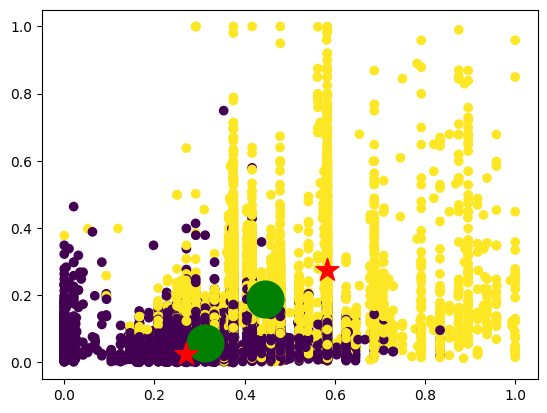

In [63]:
old_centroids = np.copy(centroids)

for k in range(n_clusters):
    c_idxs = np.flatnonzero(cluster_label==k)
    centroids[k] = X[c_idxs].mean(axis = 0)

plt.scatter(X[:, 2], X[:, 3], c = cluster_label)
plt.scatter(centroids[:,2], centroids[:,3], marker='o', s=700, c='green')
plt.scatter(old_centroids[:, 2], old_centroids[:, 3], marker='*', s=300, c='red');

In [64]:
def delta_centroids(centroids,old_centroids):
    return (distance(centroids,old_centroids)/distance(old_centroids, np.mean(old_centroids))).mean()

delta_centroids(centroids,old_centroids)

0.31623615493109386

In [65]:
def fit(X, n_clusters, centroids, max_iter=10, tol=0.01):

    dcentr = np.inf

    for i in range(max_iter):

        old_centroids = np.copy(centroids)
        cluster_label=predict(X, n_clusters, centroids)

        for k in range(n_clusters):
            c_idxs = np.flatnonzero(cluster_label==k)
            centroids[k] = X[c_idxs].mean(axis = 0)

        dcentr = delta_centroids(centroids,old_centroids)

        if dcentr<=tol:
            break

    print('Мы остановились на итерации:', i,'изменение центра кластеров: ',dcentr)

    return cluster_label

In [66]:
old_centroids = np.copy(centroids)

cluster_label = fit(X, n_clusters, centroids, max_iter=100, tol=0.001)

Мы остановились на итерации: 10 изменение центра кластеров:  0.0009078223811285889


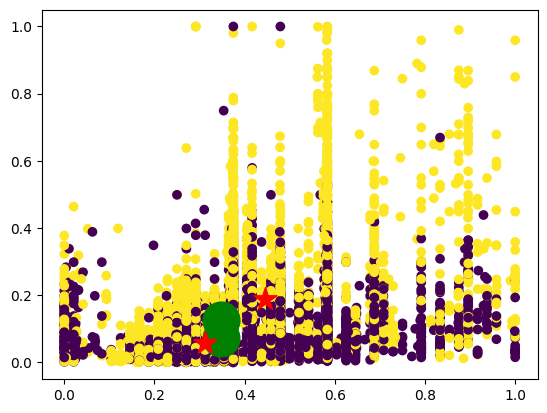

In [67]:
plt.scatter(X[:, 2], X[:, 3], c = cluster_label)
plt.scatter(centroids[:,2], centroids[:,3], marker='o', s=700, c='green')
plt.scatter(old_centroids[:, 2], old_centroids[:, 3], marker='*', s=300, c='red');

In [68]:
class KMeans():
    def __init__(self,n_clusters = 2, centroids = None, max_iter=10, tol=0.01):
        self.n_clusters = n_clusters
        self.centroids  = centroids
        self.max_iter   = max_iter
        self.tol        = tol
        self.iters      = None
    #-------------------------------------
    def distance(self, X1, X2):
        return np.sqrt(np.sum(np.square(X1 - X2).T,axis=0))
    #-------------------------------------
    def init_centroids(self, X):
        c_idxs = np.random.randint(0, X.shape[0], size = self.n_clusters)
        return X[c_idxs,:]
    #-------------------------------------
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))

        for i,centr in enumerate(self.centroids):
            distances[:,i] = self.distance(centr,X)

        return np.argmin(distances,axis = 1) # метка кластера
    #-------------------------------------
    def delta_centroids(self,old_centroids):
        return (
                distance(self.centroids,old_centroids)/
                distance(old_centroids, np.mean(old_centroids))
               ).mean()
    #-------------------------------------
    def fit(self, X):

        if self.centroids is None:
            self.centroids = self.init_centroids(X)

        d_centrs = np.inf

        for i in range(self.max_iter):

            old_centroids = np.copy(self.centroids)

            cluster_label = self.predict(X)

            for k in range(self.n_clusters):

                c_idxs = np.flatnonzero(cluster_label==k)

                self.centroids[k] = X[c_idxs].mean(axis = 0)

            d_centrs = self.delta_centroids(old_centroids)

            self.iters = i
            if d_centrs<=self.tol:
                break
        return self
    #-------------------------------------
    def fit_transform(self, X):
        return self.fit(X).predict(X)

Мы остановились на итерации: 35


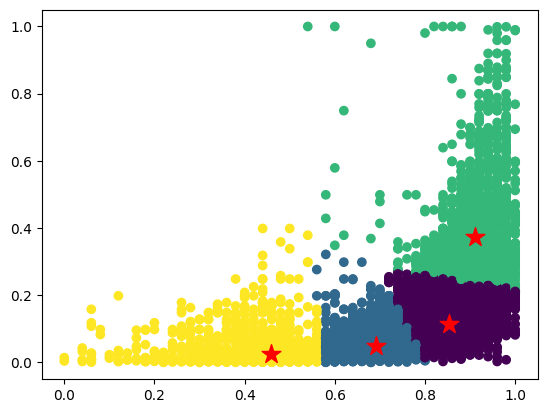

In [69]:
kmeans   = KMeans(n_clusters=4, max_iter=1000, tol=0.0001)
c_labels = kmeans.fit_transform(X[:,[0,3]])

print('Мы остановились на итерации:',kmeans.iters)

plt.scatter(X[:, 0], X[:, 3], c = c_labels)

plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')

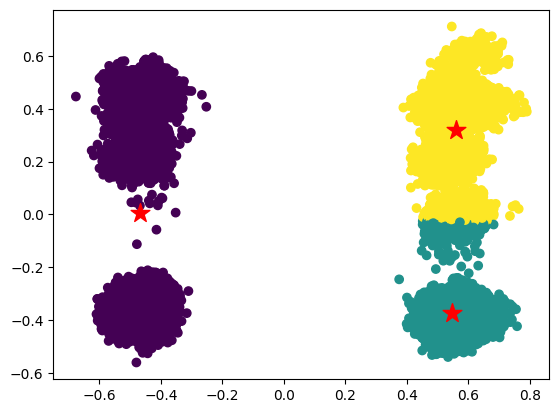

Мы остановились на итерации: 29


In [70]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

pca = PCA(n_components = 2)
pca.fit(X)
X_new = pca.transform(X)


kmeans   = KMeans(n_clusters=3, max_iter=1000, tol=0.00001)
c_labels = kmeans.fit_transform(X_new)

plt.scatter(X_new[:,0],X_new[:,1], c = c_labels);
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1],marker='*', s=200, c='red')
plt.show();
print('Мы остановились на итерации:',kmeans.iters)

## **Контрольные вопросы**



1.   Как связаны главные комопненты с исходными данными?

Главные комопоненты выступают в роли новых осей для исходных данных, служа таким образом для уменьшения их размерности.
2.   Сделайте грубую оценку сжатия данных, если исходная матри-
ца имела размерность (4250, 7), а при восстановлении используются три главные компоненты.


После преобразования, в данных останется 3 оси(столбца). Новая размерность будет равна (4250, 3)

3. Сгенерируйте данные в виде эллипса с центром в точке (1.5,
-2.5), радиусами (3, 2.5), углом 65 и количеством точек 1100.
Оцените собственные вектора, собственные значения, мак-
симальные и минимальные значения в пространстве главных
компонент.


In [102]:
def create_elipsoid_data(C1 = 0,C2 = 0 ,S1 = 5,S2 =1, theta =45, N = 250, random_state = 42):
  if random_state:
    np.random.seed(random_state)
    theta = np.pi*theta/180
    Centers = np.array([C1,C2])
    Sigmas = np.array([S1,S2])
    R = np.array([[np.cos(theta), - np.sin(theta)], [np.sin(theta), np.cos(theta)]])

  return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T

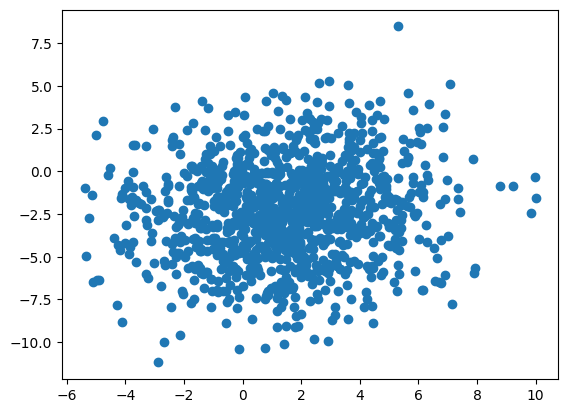

In [103]:
center = (1.5, -2.5)
max_dispersion = (3, 2.5)

data_4 = create_elipsoid_data(C1 = center[0], C2 = center[1], S1 = max_dispersion[0], S2 = max_dispersion[1], N = 1100, theta = 65)
data_x = []
data_y = []


for i in range(len(data_4)):
  data_x.append(data_4[i][0])
  data_y.append(data_4[i][1])

plt.scatter(data_x, data_y)

In [107]:
pca_prac = PCA(n_components = 10)
pca_prac.fit(data_4)
print("Values - {}\nVectors - {}".format(pca_prac.values, pca_prac.components))

Values - [8.59446753 6.22432318]
Vectors - [[-0.38952007 -0.92101798]
 [-0.92101798  0.38952007]]


4. Для набора данных Cars проанализируйте веса главных ком-
понент при использовании числовых признаков. Какой из па-
раметров вносит наименьший вклад в первую главную компо-
ненту?

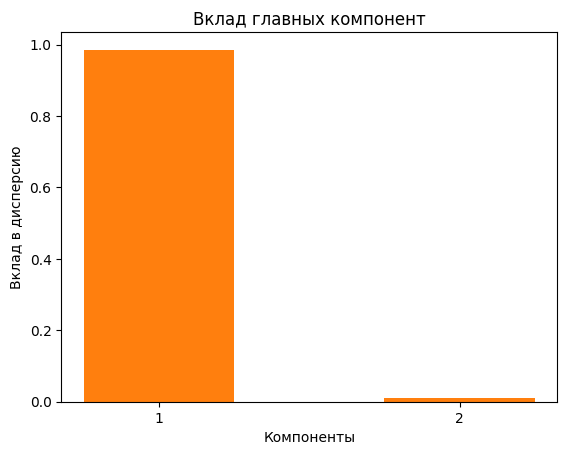

In [125]:
from sklearn.decomposition import PCA
pca_p = PCA(n_components = 2)
pca_p.fit(df)

index = [1, 2]


fig, ax = plt.subplots()
for i in range(2):
  p = ax.bar(index, pca_p.explained_variance_ratio_, 0.5)

plt.xticks(index)
plt.xlabel('Компоненты')
plt.ylabel('Вклад в дисперсию')
plt.title('Вклад главных компонент')
plt.show()

Наименьший вклад в дисперсию вносит вторая главная компонента